In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## AGE AND CABIN HAS LOTS OF NULL VALUES IN TEST DATASET

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## AGE AND CABIN HAS LOTS OF NULL VALUES IN TRAIN DATASET 

In [10]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
survived=df_train[df_train["Survived"]==1]
not_survived=df_train[df_train["Survived"]==0]

In [13]:
print("Survived: %i (%.1f%%)"%(len(survived),float(len(survived))/len(df_train)*100.0))

Survived: 342 (38.4%)


In [14]:
print("Not Survived: %i (%.1f%%)"%(len(not_survived),float(len(not_survived))/len(df_train)*100.0))

Not Survived: 549 (61.6%)


In [15]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
df_train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [17]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Higher the Pclass has, higher the chances of survival

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

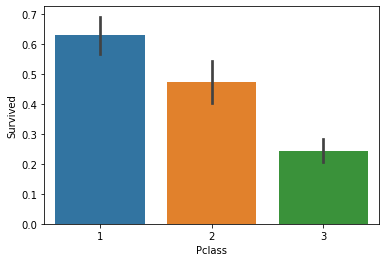

In [18]:
sns.barplot(x='Pclass',y='Survived',data=df_train)

In [19]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
df_train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [21]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


## The number of female survived is more in numbers than men

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

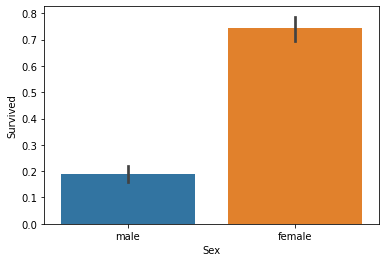

In [22]:
sns.barplot(x='Sex',y='Survived',data=df_train)

In [23]:
df_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [24]:
df_train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [25]:
df_train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

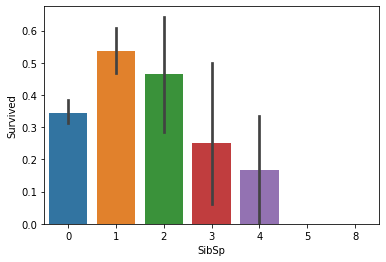

In [26]:
sns.barplot(x='SibSp',y='Survived',data=df_train)

## Family with 1 sibling or spouse has higher survival chance and Family with more than 4 Siblings or spouse has no survival chances

In [27]:
df_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [28]:
df_train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [29]:
df_train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

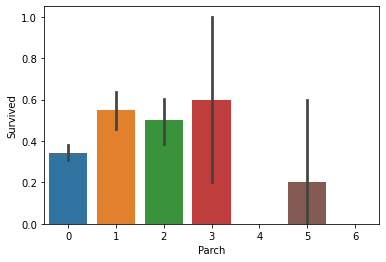

In [30]:
sns.barplot(x='Parch',y='Survived',data=df_train)

In [31]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
df_train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [33]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

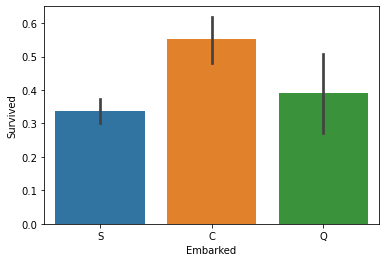

In [34]:
sns.barplot(x='Embarked',y='Survived',data=df_train)

In [35]:
m=pd.crosstab(df_train['Pclass'],df_train['Sex'])
print(m)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

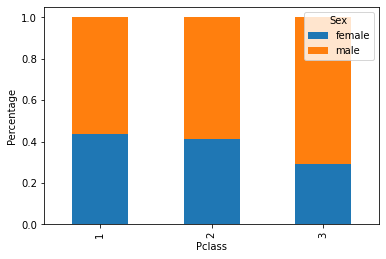

In [36]:
m.div(m.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

C:\Users\91910\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\91910\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\91910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


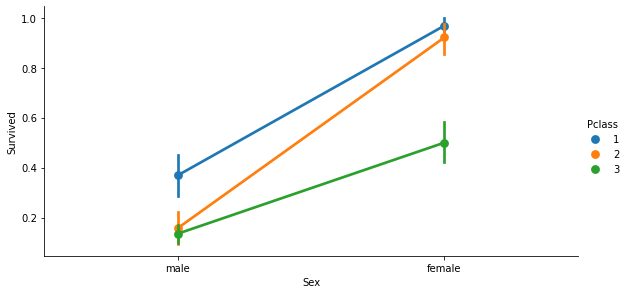

In [37]:
sns.factorplot('Sex','Survived',hue='Pclass',size=4,aspect=2,data=df_train)

C:\Users\91910\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


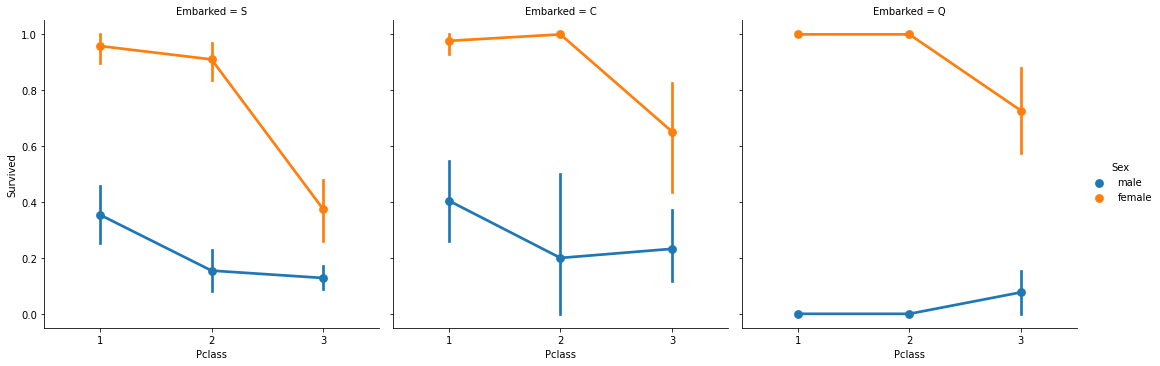

In [38]:
sns.factorplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=df_train)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

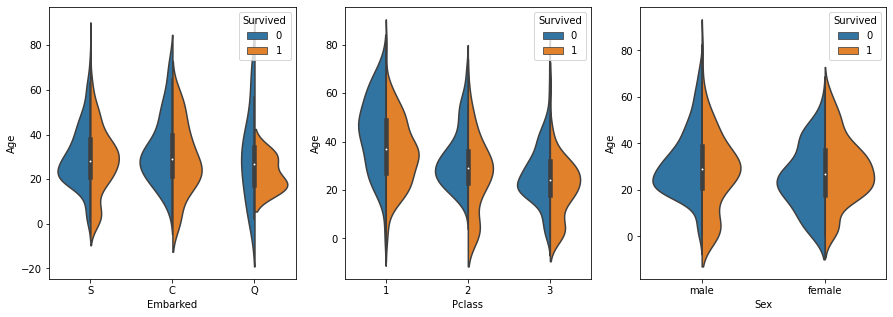

In [39]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.violinplot(x="Embarked",y="Age",hue="Survived",data=df_train,split=True,ax=ax1)
sns.violinplot(x="Pclass",y="Age",hue="Survived",data=df_train,split=True,ax=ax2)
sns.violinplot(x="Sex",y="Age",hue="Survived",data=df_train,split=True,ax=ax3)

C:\Users\91910\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Male Age'>

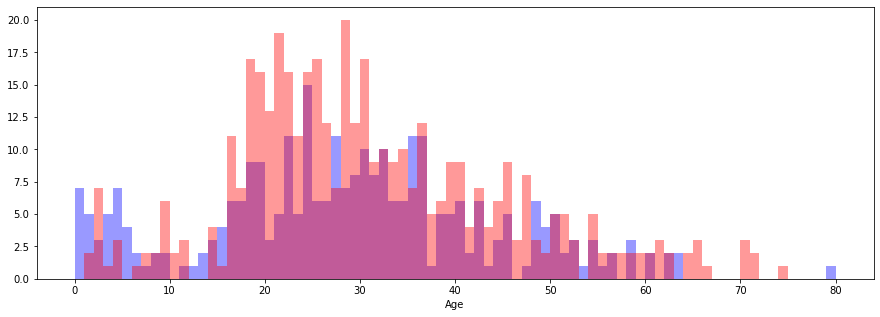

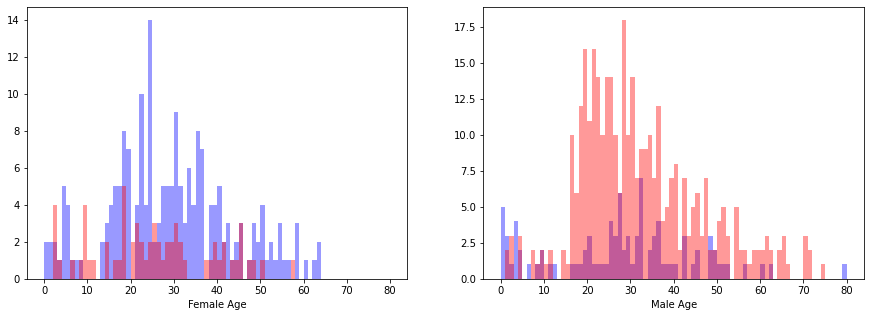

In [40]:
total_survived= df_train[df_train['Survived']==1]
total_not_survived= df_train[df_train['Survived']==0]

survived_m= df_train[(df_train['Survived']==1) & (df_train["Sex"]=="male")]
survived_f= df_train[(df_train['Survived']==1) & (df_train["Sex"]=="female")]

not_survived_m= df_train[(df_train["Survived"]==0) & (df_train["Sex"]=="male")]
not_survived_f= df_train[(df_train["Survived"]==0) & (df_train["Sex"]=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived["Age"].dropna().values, bins=range(0, 81, 1), kde=False, color='blue' )
sns.distplot(total_not_survived["Age"].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel="Age")

plt.figure(figsize=[15,5])
plt.subplot(121)
sns.distplot(survived_f["Age"].dropna().values, bins=range(0,81,1),kde=False, color='blue')
sns.distplot(not_survived_f["Age"].dropna().values,bins=range(0,81,1),kde=False,color='red',axlabel="Female Age")

plt.subplot(122)
sns.distplot(survived_m["Age"].dropna().values, bins=range(0,81,1),kde=False,color='blue')
sns.distplot(not_survived_m["Age"].dropna().values, bins=range(0,81,1),kde=False, color='red', axlabel="Male Age")



## Correlating Features

<AxesSubplot:>

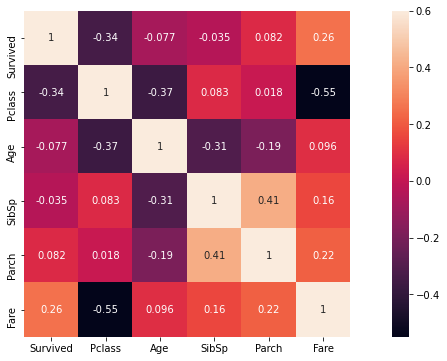

In [41]:
plt.figure(figsize=(15,6))
sns.heatmap(df_train.drop('PassengerId',axis=1).corr(),vmax=0.6,square=True,annot=True)

In [42]:
comb=[df_train,df_test]

for df in comb:
  df['Title']=df.Name.str.extract('([A-Za-z]+)\.')

In [43]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [44]:
pd.crosstab(df_train['Title'],df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [45]:
for df in comb:
    df['Title']=df['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Rev','Sir'],'Other')
    df['Title']=df['Title'].replace('Mlle','Miss')
    df['Title']=df['Title'].replace('Ms','Miss')
    df['Title']=df['Title'].replace('Mme','Mrs')
df_train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [46]:
title_map={"Master":1,"Miss":2,"Mr":3,"Mrs":4,"Others":5}

In [47]:
for df in comb:
    df['Title']=df['Title'].map(title_map)
    df['Title']=df['Title'].fillna(0)

In [48]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.0


In [49]:
for df in comb:
    df['Sex']=df['Sex'].map({'female':1,"male":0}).astype(int)

In [50]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,4.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,4.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,3.0


In [51]:
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [52]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [53]:
for df in comb:
    df['Embarked']=df['Embarked'].fillna('S')

In [54]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,4.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,4.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,3.0


In [55]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [56]:
for df in comb:
    df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [57]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,4.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,4.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,3.0


In [58]:
df_train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [59]:
for df in comb:
    agemean=df['Age'].mean()
    agestd=df['Age'].std()
    agenull=df['Age'].isnull().sum()
    
    agenull_rand=np.random.randint(agemean-agestd,agemean+agestd,size=agenull)
    df['Age'][np.isnan(df['Age'])]=agenull_rand
    df['Age']=df['Age'].astype(int)
   
df_train['AgeRange']=pd.cut(df_train['Age'], 5)

print(df_train[['AgeRange','Survived']].groupby(['AgeRange'],as_index=False).mean())

        AgeRange  Survived
0  (-0.08, 16.0]  0.517857
1   (16.0, 32.0]  0.364253
2   (32.0, 48.0]  0.357977
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


<ipython-input-59-00f264220fcb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][np.isnan(df['Age'])]=agenull_rand


In [60]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,3.0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,4.0,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2.0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,4.0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,3.0,"(32.0, 48.0]"


In [61]:
for df in comb:
    df.loc[df['Age'] <=16,'Age']=0
    df.loc[(df['Age']>16) & (df['Age']<=32),'Age']=1
    df.loc[(df['Age']>32) & (df['Age']<=48),'Age']=2
    df.loc[(df['Age']>48) & (df['Age']<=64),'Age']=3
    df.loc[df['Age']>64,'Age']=4

In [62]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,3.0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,4.0,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2.0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,4.0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,3.0,"(32.0, 48.0]"


In [63]:
for df in comb:
    df['Fare']=df['Fare'].fillna(df_train['Fare'].median())

In [64]:
df_train['FareRange']=pd.qcut(df_train['Fare'],4)
print(df_train[['FareRange','Survived']].groupby(['FareRange'],as_index=False).mean())

         FareRange  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [65]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,3.0,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,4.0,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2.0,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,4.0,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,3.0,"(32.0, 48.0]","(7.91, 14.454]"


In [66]:
for df in comb:
    df.loc[df['Fare']<=7.91,'Fare']=0
    df.loc[(df['Fare']>7.91) & (df['Fare']<=14.454),'Fare']=1
    df.loc[(df['Fare']>14.454) & (df['Fare']<=31.0),'Fare']=2
    df.loc[(df['Fare']>31.0) & (df['Fare']<=512.329),'Fare']=3
    df['Fare']=df['Fare'].astype(int)

In [67]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,3.0,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,4.0,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2.0,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,4.0,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,3.0,"(32.0, 48.0]","(7.91, 14.454]"


In [68]:
for df in comb:
    df['Family']=df['SibSp']+df['Parch']+1
    
print(df_train[['Family','Survived']].groupby(['Family'],as_index=False).mean())

   Family  Survived
0       1  0.303538
1       2  0.552795
2       3  0.578431
3       4  0.724138
4       5  0.200000
5       6  0.136364
6       7  0.333333
7       8  0.000000
8      11  0.000000


In [69]:
for df in comb:
    df['Alone']=0
    df.loc[df['Family']==1,'Alone']=1
    
print(df_train[['Alone','Survived']].groupby(['Alone'],as_index=False).mean())

   Alone  Survived
0      0  0.505650
1      1  0.303538


In [70]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange,Family,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,3.0,"(16.0, 32.0]","(-0.001, 7.91]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,4.0,"(32.0, 48.0]","(31.0, 512.329]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2.0,"(16.0, 32.0]","(7.91, 14.454]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,4.0,"(32.0, 48.0]","(31.0, 512.329]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,3.0,"(32.0, 48.0]","(7.91, 14.454]",1,1


In [71]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,Alone
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0,NaN,2,3.0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,0,NaN,0,4.0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,1,NaN,2,3.0,1,1
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,1,NaN,0,3.0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,1,NaN,0,4.0,3,0


In [72]:
feature_drop=['Name','SibSp','Parch','Ticket','Cabin','Family']
df_train=df_train.drop(feature_drop,axis=1)
df_test=df_test.drop(feature_drop,axis=1)
df_train=df_train.drop(['PassengerId','AgeRange','FareRange'],axis=1)

In [73]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,1,0,0,3.0,0
1,1,1,1,2,3,1,4.0,0
2,1,3,1,1,1,0,2.0,1
3,1,1,1,2,3,0,4.0,0
4,0,3,0,2,1,0,3.0,1


In [74]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,892,3,0,2,0,2,3.0,1
1,893,3,1,2,0,0,4.0,0
2,894,2,0,3,1,2,3.0,1
3,895,3,0,1,1,0,3.0,1
4,896,3,1,1,1,0,4.0,0


In [75]:
x_train=df_train.drop('Survived',axis=1)
y_train=df_train['Survived']
x_test=df_test.drop("PassengerId",axis=1).copy()
x_train.shape,y_train.shape,x_test.shape

((891, 7), (891,), (418, 7))

## Classification and Accuracy

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
log=LogisticRegression()
log.fit(x_train,y_train)
pred_log=log.predict(x_test)
acc=round(log.score(x_train,y_train)*100,2)
print(str(acc)+ ' % ')

79.35 % 


In [78]:
svm=SVC()
svm.fit(x_train,y_train)
pred_svm=svm.predict(x_test)
acc_svm=round(svm.score(x_train,y_train)*100,2)
print(str(acc_svm)+ ' % ')

64.09 % 


In [79]:
lin=LinearSVC()
lin.fit(x_train,y_train)
pred_lin=lin.predict(x_test)
acc_lin=round(lin.score(x_train,y_train)*100,2)
print(str(acc_lin)+ ' % ')

79.12 % 


C:\Users\91910\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [80]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
acc_knn=round(knn.score(x_train,y_train)*100,2)
print(str(acc_knn)+ ' % ')

84.51 % 


In [81]:
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)
pred_dec=dec.predict(x_test)
acc_dec=round(dec.score(x_train,y_train)*100,2)
print(str(acc_dec)+ ' % ')

87.21 % 


In [82]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
acc_rf=round(rf.score(x_train,y_train)*100,2)
print(str(acc_rf)+ ' % ')

87.21 % 


In [83]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
acc_gnb=round(gnb.score(x_train,y_train)*100,2)
print(str(acc_gnb)+ ' % ')

71.83 % 


## Confusion Matrix

Accuracy: 87 % 

Confusion Matrix in Numbers
[[504  45]
 [ 69 273]]

Confusion Matrix in Percentage
[[0.92 0.08]
 [0.2  0.8 ]]



<ipython-input-84-b12f7d01e28b>:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)


<AxesSubplot:>

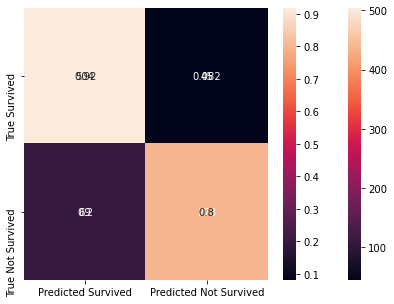

In [84]:
from sklearn.metrics import confusion_matrix
import itertools

rf1=RandomForestClassifier(n_estimators=100)
rf1.fit(x_train,y_train)
pred_rf1=rf1.predict(x_train)
acc_rf1=round(rf1.score(x_train,y_train)*100,2)
print("Accuracy: %i %% \n"%acc_rf1)

x0=['Survived','Not Survived']

con_mat=confusion_matrix(y_train,pred_rf1)
np.set_printoptions(precision=2)

print('Confusion Matrix in Numbers')
print(con_mat)
print('')

con_matrix_percent=con_mat.astype('float')/con_mat.sum(axis=1)[:,np.newaxis]

print('Confusion Matrix in Percentage')
print(con_matrix_percent)
print('')

true_class_names=['True Survived','True Not Survived']
predicted_class_names=['Predicted Survived','Predicted Not Survived']

df_con_mat=pd.DataFrame(con_mat,index=true_class_names,columns=predicted_class_names)
df_con_mat_percent=pd.DataFrame(con_matrix_percent,index=true_class_names,columns=predicted_class_names)

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.heatmap(df_con_mat,annot=True,fmt='d')

plt.subplot(121)
sns.heatmap(df_con_mat_percent,annot=True)

## Model Comparison

In [85]:
models=pd.DataFrame({
    'Model':['Logistic Regression','Support Vector Machine','Linear SVC','KNN','Decision Tree','Random Forest','Naive Bayes'],

    'Score':[acc,acc_svm,acc_lin,acc_knn,acc_dec,acc_rf,acc_gnb]

})
models.sort_values(by='Score',ascending=False)

,Model,Score
4,Decision Tree,87.21
5,Random Forest,87.21
3,KNN,84.51
0,Logistic Regression,79.35
2,Linear SVC,79.12
6,Naive Bayes,71.83
1,Support Vector Machine,64.09


In [86]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,892,3,0,2,0,2,3.0,1
1,893,3,1,2,0,0,4.0,0
2,894,2,0,3,1,2,3.0,1
3,895,3,0,1,1,0,3.0,1
4,896,3,1,1,1,0,4.0,0


In [87]:
submission=pd.DataFrame({
        "PassengerId": df_test["PassengerId"], 
           "Survived":pred_rf
})

# submission.to_csv('submission.csv',index=False)